## Reto 4: Las mejores 50

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - Agrupaciones y reducciones
        - Reordenamiento
        - Unión de `DataFrames` usando `merge`
    
---
    
### 2. Desarrollo:

#### a) Las 50 películas con mejor rating

Vamos a hacer una visualización muy sencilla de las 50 películas que tienen mejor rating en nuestro dataset. Tu Reto consiste en seguir los siguientes pasos:

1. Lee los archivos `movies` y `ratings`.
2. Agrupa `ratings` por id de película y computa el promedio de `rating` para cada película
3. Crea un nuevo `DataFrame` que sólo contenga las 50 películas con mejor promedio de ratings
4. Agrega al `DataFrame` anterior los nombres de las películas usando la tabla `movies`.
5. Al final tendrás un `DataFrame` con los nombres de las 50 películas con mejor rating ('title') y el promedio de sus ratings ('rating'). Asigna este resultado a la variable `las_mejores_50`.

In [2]:
import pandas as pd

In [15]:
mov = pd.read_csv('C:/Users/LLerma/Google Drive/Analisis de Datos/M3 - Introduccion a Python/Files/Movielens/movies-separated_by_money-raw.csv', sep = "$")
rat = pd.read_csv('C:/Users/LLerma/Google Drive/Analisis de Datos/M3 - Introduccion a Python/Files/Movielens/ratings-raw.csv')

In [21]:
mov.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [85]:
rat.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [86]:
rat.groupby("movie_id")["rating"].value_counts()

movie_id  rating
1         4         835
          5         820
          3         345
          2          61
          1          16
                   ... 
3952      4         181
          3          89
          5          83
          2          26
          1           9
Name: rating, Length: 16912, dtype: int64

In [100]:
test = rat.groupby('movie_id')['rating'].mean()
test

movie_id
1       4.146846
2       3.201141
3       3.016736
4       2.729412
5       3.006757
          ...   
3948    3.635731
3949    4.115132
3950    3.666667
3951    3.900000
3952    3.780928
Name: rating, Length: 3706, dtype: float64

In [87]:
rat_promedio = pd.DataFrame(rat.groupby("movie_id")["rating"].agg("mean"))
rat_promedio

,rating
movie_id,
1,4.146846
2,3.201141
3,3.016736
4,2.729412
5,3.006757
...,...
3948,3.635731
3949,4.115132
3950,3.666667


In [88]:
# Ordenar por rating

rat_promedio_50 = rat_promedio.sort_values('rating', ascending=False).head(50)
rat_promedio_50.head()

,rating
movie_id,
989,5.0
3881,5.0
1830,5.0
3382,5.0
787,5.0


In [89]:
rat_promedio_50.head(1)

,rating
movie_id,
989,5.0


In [90]:
mov.head(1)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [91]:
# Merge

tabla = pd.merge(rat_promedio_50, mov, right_on='movie_id', left_index=True).sort_values("rating", ascending=False)
tabla.head()

,rating,movie_id,title,genres
977,5.0,989,Schlafes Bruder (Brother of Sleep) (1995),Drama
3810,5.0,3881,Bittersweet Motel (2000),Documentary
1762,5.0,1830,Follow the Bitch (1998),Comedy
3312,5.0,3382,Song of Freedom (1936),Drama
777,5.0,787,"Gate of Heavenly Peace, The (1995)",Documentary


In [92]:
las_mejores_50 = tabla

Pídele a tu experta la función de verificación `plotting_best_50` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado:

C:\Otro\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


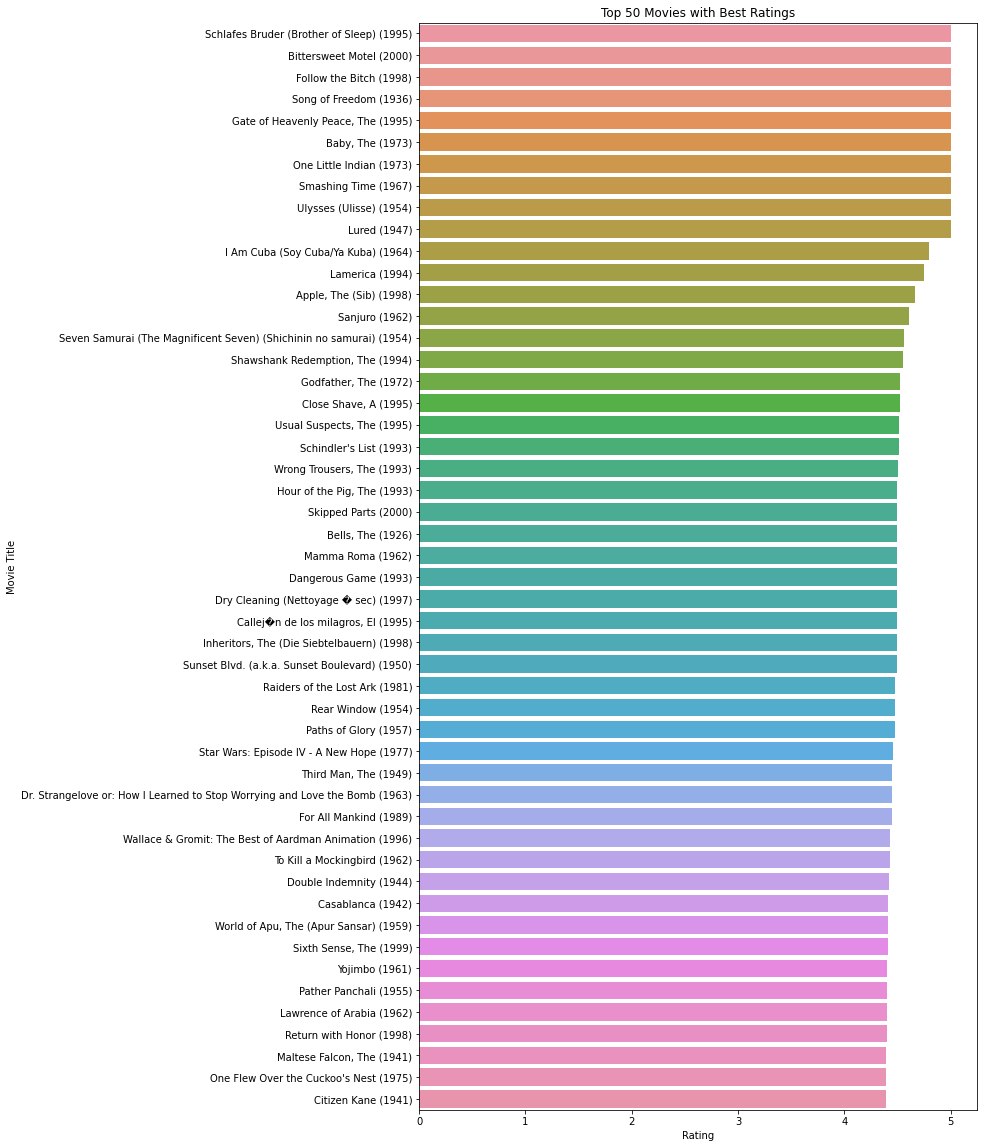

In [93]:
def plotting_best_50(las_mejores_50):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10, 20))
    ax.set_title('Top 50 Movies with Best Ratings')
    splot = sns.barplot(las_mejores_50['rating'], las_mejores_50['title'], ax=ax)
    ax.set(xlabel='Rating', ylabel='Movie Title')

plotting_best_50(las_mejores_50)

<details><summary>Solución</summary>

```python
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv', index_col=0)
means_of_ratings = ratings.groupby('movie_id')['rating'].mean()
means_of_ratings_top_50 = means_of_ratings.sort_values(ascending=False).head(50)
las_mejores_50 = pd.merge(means_of_ratings_top_50, movies, left_index=True, right_on='movie_id')
```
    
</details>